In [1]:
!wget "http://cb.lk/covid_19"

--2020-12-29 05:11:55--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-12-29 05:11:55--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-12-29 05:11:56--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-12-29 05:11:56--  https://www.dropbox.com/s/ra

In [2]:

!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [4]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Val"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [6]:
## CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [8]:
# Training 
train_datagen =  image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = image.ImageDataGenerator(rescale=1./255)

In [9]:

train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [10]:

train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [11]:
validation_generator = test_datagen.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [19]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 7,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
7/7 [==============================] - 76s 11s/step - loss: 0.2463 - accuracy: 0.9196 - val_loss: 0.2535 - val_accuracy: 0.9000
Epoch 2/10
7/7 [==============================] - 71s 10s/step - loss: 0.1999 - accuracy: 0.9152 - val_loss: 0.2178 - val_accuracy: 0.9833
Epoch 3/10
7/7 [==============================] - 71s 10s/step - loss: 0.1480 - accuracy: 0.9509 - val_loss: 0.0603 - val_accuracy: 0.9833
Epoch 4/10
7/7 [==============================] - 71s 10s/step - loss: 0.1764 - accuracy: 0.9509 - val_loss: 0.1411 - val_accuracy: 0.9500
Epoch 5/10
7/7 [==============================] - 71s 10s/step - loss: 0.1214 - accuracy: 0.9554 - val_loss: 0.1941 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 70s 10s/step - loss: 0.1816 - accuracy: 0.9330 - val_loss: 0.1027 - val_accuracy: 0.9500
Epoch 7/10
7/7 [==============================] - 70s 10s/step - loss: 0.0977 - accuracy: 0.9509 - val_loss: 0.1136 - val_accuracy: 0.9667
Epoch 8/10
7/7 [===========

In [20]:
# TODO-
# Class Activation Maps
# Grad CAM

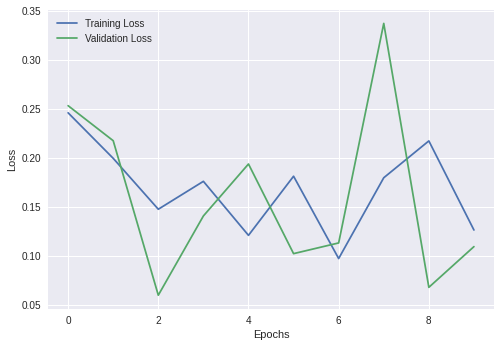

In [21]:
# Visualization
import matplotlib.pyplot as plt

h = hist.history
plt.style.use('seaborn')
plt.plot(h['loss'],label='Training Loss')
plt.plot(h['val_loss'],label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

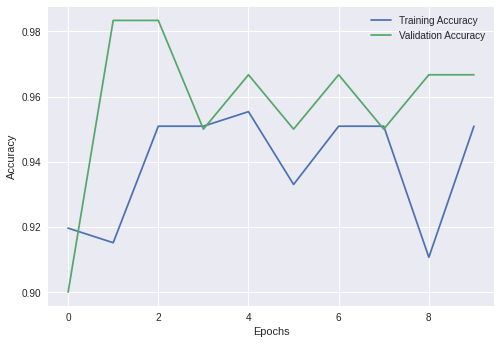

In [22]:
plt.style.use('seaborn')
plt.plot(h['accuracy'],label='Training Accuracy')
plt.plot(h['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [23]:

## Plot confusion Matrix
from pathlib import Path
dirs = Path(TRAIN_PATH).glob("*")
train_imgs = []
label = []
for each_dir in dirs:

  files = each_dir.glob("*")
  for each_file in files:
    img = image.load_img(each_file,target_size=(224,224))
    img_arr = image.img_to_array(img)/255.0
    train_imgs.append(img_arr)
    if str(each_dir).split("/")[-1] == "Normal":
      label.append(1)
    else:
      label.append(0)

In [25]:
train_imgs = np.array(train_imgs)

In [26]:
print(train_imgs.shape)

(224, 224, 224, 3)


In [27]:
from sklearn.utils import shuffle
train_imgs,label = shuffle(train_imgs,label,random_state=2)

In [28]:
outputs = model.predict_classes(train_imgs)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [29]:
### Use Directly - adapted from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [30]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(outputs,label)
print(cnf_matrix)

[[111   1]
 [  1 111]]


Confusion matrix, without normalization
[[111   1]
 [  1 111]]


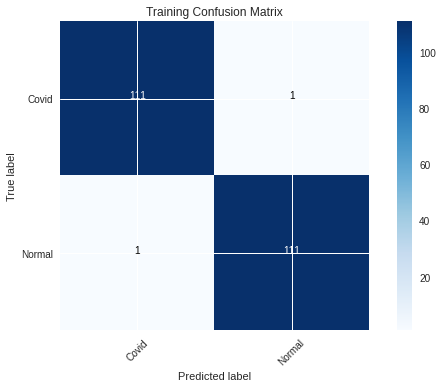

In [31]:
plot_confusion_matrix(cnf_matrix,classes=["Covid","Normal"],title="Training Confusion Matrix")

In [32]:
## Plot confusion Matrix
dirs = Path(VAL_PATH).glob("*")
test_imgs = []
test_label = []
for each_dir in dirs:

  files = each_dir.glob("*")
  for each_file in files:

    img = image.load_img(each_file,target_size=(224,224))
    img_arr = image.img_to_array(img)/255.0
    test_imgs.append(img_arr)
    if str(each_dir).split("/")[-1] == "Normal":
      test_label.append(1)
    else:
      test_label.append(0)

In [33]:
test_imgs = np.array(test_imgs)

In [34]:
print(test_imgs.shape)

(60, 224, 224, 3)


In [35]:
test_imgs,test_label = shuffle(test_imgs,test_label,random_state=2)
preds = model.predict_classes(test_imgs)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [36]:
test_cnf_matrix = confusion_matrix(preds,test_label)
print(test_cnf_matrix)

[[30  2]
 [ 0 28]]


Confusion matrix, without normalization
[[30  2]
 [ 0 28]]


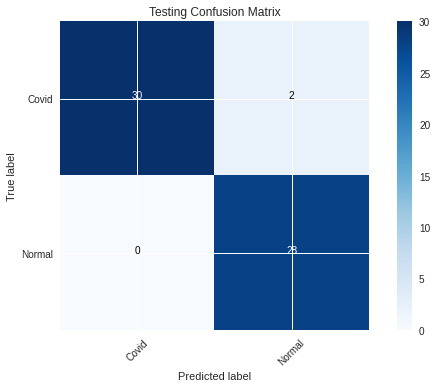

In [37]:
plot_confusion_matrix(test_cnf_matrix,classes=["Covid","Normal"],title="Testing Confusion Matrix")